In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
# Paths for dataset preparation
base_dir = 'projectdataset(1)'  # Replace with actual dataset path
train_dir = os.path.join(base_dir, 'Training')
val_dir = os.path.join(base_dir, 'dataset')
test_dir = os.path.join(base_dir, 'Test')


In [3]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Use categorical mode for multi-class classification
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical'
)

# 🔎 Check class labels
print("Class indices:", train_generator.class_indices)


Found 197 images belonging to 3 classes.
Found 93 images belonging to 3 classes.
Class indices: {'Healthy': 0, 'Not Skin': 1, 'Vitiligo': 2}


In [4]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 output neurons for 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\Vinutha CM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # fine-tune later if needed

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Vinutha CM\AppData\Local\Temp\ipykernel_23396\3855598014.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


In [6]:
# Training
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)


c:\Users\Vinutha CM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.2333 - loss: 1.7596

c:\Users\Vinutha CM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2397 - loss: 1.7379 - val_accuracy: 0.3548 - val_loss: 1.2402
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 716ms/step - accuracy: 0.4947 - loss: 1.2430 - val_accuracy: 0.6129 - val_loss: 0.8093
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 683ms/step - accuracy: 0.5737 - loss: 0.9623 - val_accuracy: 0.7634 - val_loss: 0.5783
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 670ms/step - accuracy: 0.7433 - loss: 0.6198 - val_accuracy: 0.8172 - val_loss: 0.4409
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 659ms/step - accuracy: 0.7964 - loss: 0.5185 - val_accuracy: 0.8602 - val_loss: 0.4315
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 684ms/step - accuracy: 0.7715 - loss: 0.5030 - val_accuracy: 0.8710 - val_loss: 0.3470
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 738ms/step - accuracy: 0.8003 - loss: 0.4603 - val_accuracy: 0.8710 - val_loss: 0.3360
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 669ms/step - accuracy: 0.8600 - loss: 0.3625 - val_accuracy: 0.8925 - val_loss: 0.3060
Epoch

In [7]:
# 📈 Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step - accuracy: 0.9101 - loss: 0.2940
✅ Test Accuracy: 0.91


In [8]:
# Save the model
model.save('vitiligo_model.h5')
print("Model saved as vitiligo_model.h5")

Model saved as vitiligo_model.h5


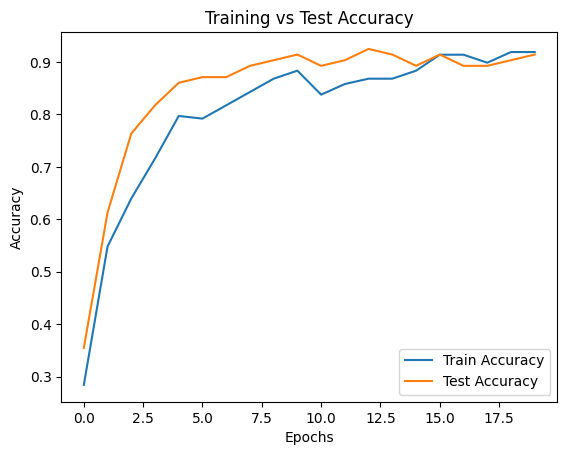

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Training vs Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
